# Import Statements

In [1]:
from gnn import GraphNeuralNetwork
from graph import read_from_csv
from chaitin import findRegularChaitinColoring
import torch
import networkx as nx

# Load a Graph

In [2]:
graph = read_from_csv('./graphs/2002-10-12-StructureArgsSimple.graph')
K = 5

# Process with Chaitins Algorithm

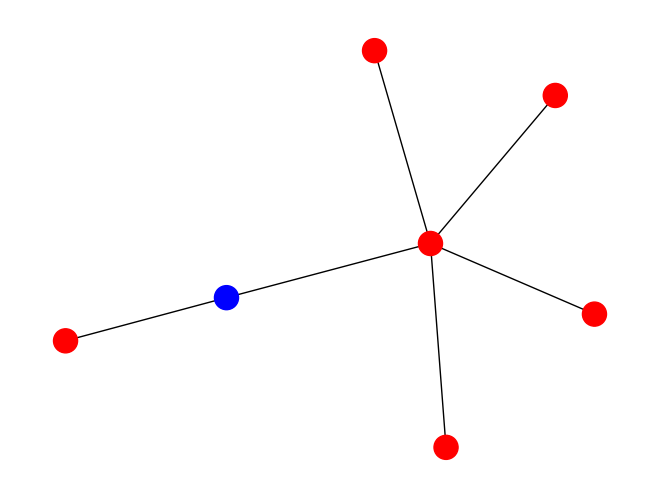

In [3]:
# Find a coloring
coloring = findRegularChaitinColoring(graph, K)

# Plot the graph
graph.get_networkx_colored(coloring)

In [4]:
# Calculate spill cost of coloring
spill_cost_chaitin = 0
for j, color in enumerate(coloring):
    if color is None:
        spill_cost_chaitin += graph.costList[j]
print(spill_cost_chaitin)

1


# Process with GNN

/opt/anaconda3/envs/compilers2/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


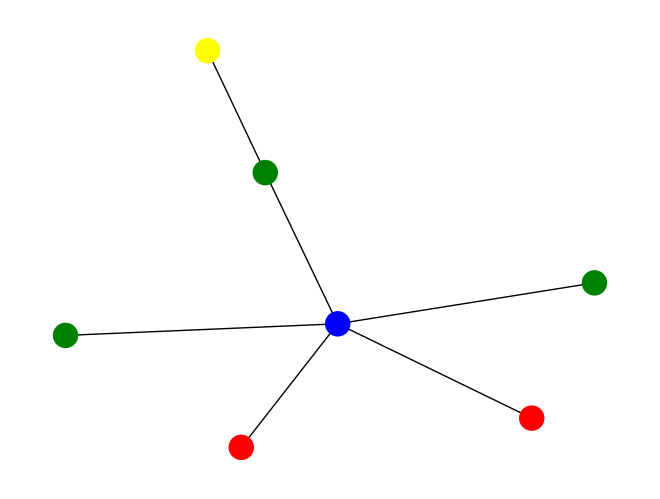

In [5]:
# Load already-trained model
GNN = GraphNeuralNetwork(num_layers=2, embed_dim=128)
GNN.load_state_dict(torch.load('./model2.torch'))
GNN.eval()
coloring_probs = GNN([graph])
coloring = torch.argmax(coloring_probs, dim=-1).squeeze().detach().numpy()

# Plot the graph
graph.get_networkx_colored(coloring)

In [6]:

spill_cost, spilled = graph.calc_spill_cost(coloring, K)
print(spill_cost)

0
